<a href="https://colab.research.google.com/github/Jahnavi-B-Krishnan/code/blob/main/NLPlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [3]:
words = ['king', 'queen', 'man', 'woman', 'child', 'mother', 'father', 'cat', 'dog', 'apple', 'orange', 'city', 'village', 'car', 'bus', 'happy', 'sad', 'run', 'walk', 'sleep']

In [8]:
embeddings = np.array([model[word] for word in words])

In [7]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(embeddings)

In [9]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=300)
tsne_result = tsne.fit_transform(pca_result)

In [11]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [12]:
sns.set(style="whitegrid")

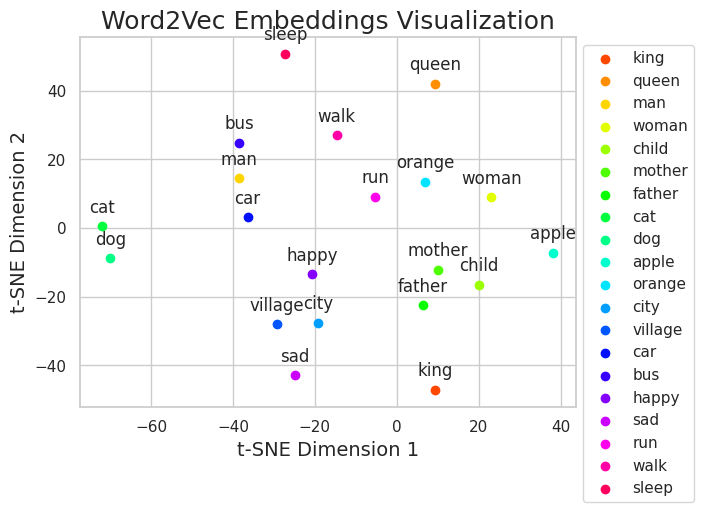

In [17]:
palette = sns.color_palette("hsv", len(words))
for i, word in enumerate(words):
  plt.scatter(tsne_result[i, 0], tsne_result[i, 1], color=palette[i], label=word)
  plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]),textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)
plt.title('Word2Vec Embeddings Visualization', fontsize=18)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [21]:
def find_analogy(word1, word2, word3):
  result = model.most_similar(positive=[word2, word3], negative=[word1])
  return result[0][0]


In [22]:
analogy = find_analogy('king', 'queen', 'father')
print(f'"king" is to "queen" as "father" is to "{analogy}"')

"king" is to "queen" as "father" is to "mother"
